# Welcome to my MTG Cube Analyzer

The purpose of this notebook is to evaluate various components within a cube to help maintain a healthy balance.
The  main functionality of this analyzer is to ensure that each color has a healthy balance and balanced mana curves.  After each sections analysis is completed a short paragraph sumarizing the results will be added.  These paragraphs are not going to be auto generated, and reflect an individuals interpretation of the data.

In [1]:
#Import all needed libraries now

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
import re

In [2]:
# Upload the compiled cube information into a json format for easier data handling.  Pandas might not be needed thanks to this.

cube_data = json.load(open("cube_compiled", "r"))

In [3]:
# pprint.pprint(cube_data)

In [5]:
card_data = {
    "card_name":[x for x in list(cube_data.keys())],
    "type": [x for x in [cube_data[card]["type"] for card in list(cube_data.keys())]],
    "colors": [x for x in [cube_data[card]["colors"] for card in list(cube_data.keys())]],
    "mana_cost": [x for x in [cube_data[card]["mana_cost"] for card in list(cube_data.keys())]],
    "cmc": [x for x in [cube_data[card]["cmc"] for card in list(cube_data.keys())]],
    "keywords": [x for x in [cube_data[card]["keywords"] for card in list(cube_data.keys())]],
    "oracle_text": [x for x in [cube_data[card]["oracle_text"] for card in list(cube_data.keys())]],
    "image_link": [x for x in [cube_data[card]["image_link_normal"] for card in list(cube_data.keys())]],
    "promo": [x for x in [cube_data[card]["promo"] for card in list(cube_data.keys())]],
    "reprint": [x for x in [cube_data[card]["reprint"] for card in list(cube_data.keys())]],
    "artist": [x for x in [cube_data[card]["artist"] for card in list(cube_data.keys())]],
    "flavor_text": [x for x in [cube_data[card]["flavor_text"] for card in list(cube_data.keys())]],
    "rarity": [x for x in [cube_data[card]["rarity"] for card in list(cube_data.keys())]],
}

In [25]:
card_df = pd.DataFrame(data=card_data)

card_df

,card_name,type,colors,mana_cost,cmc,keywords,oracle_text,image_link,promo,reprint,artist,flavor_text,rarity
0,Gaea's Cradle,Legendary Land,[],,0.0,[],{T}: Add {G} for each creature you control.,https://c1.scryfall.com/file/scryfall-cards/no...,False,False,Mark Zug,"""Here sprouted the first seedling of Argoth. H...",rare
1,Underground Sea,Land — Island Swamp,[],,0.0,[],({T}: Add {U} or {B}.),https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Cliff Childs,None,rare
2,Volcanic Island,Land — Island Mountain,[],,0.0,[],({T}: Add {U} or {R}.),https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Noah Bradley,None,rare
3,Tropical Island,Land — Forest Island,[],,0.0,[],({T}: Add {G} or {U}.),https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Franz Vohwinkel,None,rare
4,Mox Diamond,Artifact,[],{0},0.0,[],"If Mox Diamond would enter the battlefield, yo...",https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Dan Frazier,None,mythic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Fiend Hunter,Creature — Human Cleric,[W],{1}{W}{W},3.0,[],"When Fiend Hunter enters the battlefield, you ...",https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Wayne Reynolds,None,uncommon
503,Cathartic Reunion,Sorcery,[R],{1}{R},2.0,[],"As an additional cost to cast this spell, disc...",https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Howard Lyon,The chasm of years and worlds collapsed under ...,common
504,Ghor-Clan Rampager,Creature — Beast,"[G, R]",{2}{R}{G},4.0,"[Bloodrush, Trample]","Trample\nBloodrush — {R}{G}, Discard Ghor-Clan...",https://c1.scryfall.com/file/scryfall-cards/no...,False,True,Charles Urbach,"""The Simic come from the cold slow depths. How...",uncommon
505,Lightning Mauler,Creature — Human Berserker,[R],{1}{R},2.0,[Soulbond],Soulbond (You may pair this creature with anot...,https://c1.scryfall.com/file/scryfall-cards/no...,False,False,Dave Kendall,None,uncommon


In [7]:
card_df["type"][0]


'Legendary Land'

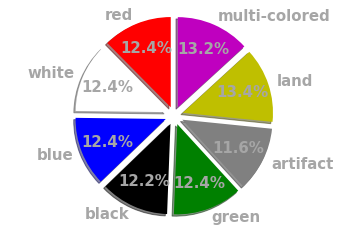

In [8]:
labels = "red", "white", "blue", "black", "green", "artifact", "land", "multi-colored"

color_dict = {
    "red":0,
    "white":0,
    "blue":0, # represented by U
    "black":0, # represented by B
    "green":0,
    "artifact":0,
    "land":0,
    "multi-colored":0,
}
i=0
for card in card_df["colors"]:
    if len(card) > 1:
        color_dict["multi-colored"] += 1
    elif len(card) == 0:
        # seperate card types from lands and artifacts
        if "Land" in card_df["type"][i]:
            color_dict["land"] += 1
        elif "Artifact" in card_df["type"][i]:
            color_dict["artifact"] += 1
    elif "R" in card:
        color_dict["red"] += 1
    elif "W" in card:
        color_dict["white"] += 1
    elif "U" in card:
        color_dict["blue"] += 1
    elif "B" in card:
        color_dict["black"] += 1
    elif "G" in card:
        color_dict["green"] += 1
    i += 1

color_dict

sizes = [
    color_dict["red"],
    color_dict["white"],
    color_dict["blue"],
    color_dict["black"],
    color_dict["green"],
    color_dict["artifact"],
    color_dict["land"],
    color_dict["multi-colored"],
        ]

colors = [
    "r",
    "w",
    "b",
    "000000",
    "g",
    "#808080",
    "y",
    "m",
]

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,)

fig1, axs1 = plt.subplots()
axs1.pie(
    sizes,
    radius = 1,
    explode=explode,
    colors = colors,
    labels = labels,
    autopct='%1.1f%%',
    pctdistance=0.7,
    shadow = True,
    startangle = 90,
    textprops={"color": '0.65',
               "fontsize": 15,
               "weight": "bold",
    #This is text properties dictionary
              }
    )

axs1.axis('equal')

plt.show()

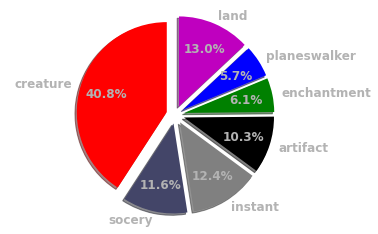

In [9]:
labels = "creature", "socery", "instant", "artifact", "enchantment", "planeswalker", "land"

type_dict = {
    "creature":0,
    "sorcery":0,
    "instant":0,
    "artifact":0,
    "enchantment":0,
    "planeswalker":0,
    "land":0,
}
i=0
for card in card_df["type"]:
    if "Creature" in card:
        type_dict["creature"] += 1
    elif "Sorcery" in card:
        type_dict["sorcery"] += 1
    elif "Instant" in card:
        type_dict["instant"] += 1
    elif "Artifact" in card:
        type_dict["artifact"] += 1
    elif "Enchantment" in card:
        type_dict["enchantment"] += 1
    elif "Planeswalker" in card:
        type_dict["planeswalker"] += 1
    elif "Land" in card:
        type_dict["land"] += 1
    i += 1

sizes = [
    type_dict["creature"],
    type_dict["sorcery"],
    type_dict["instant"],
    type_dict["artifact"],
    type_dict["enchantment"],
    type_dict["planeswalker"],
    type_dict["land"],
        ]

colors = [
    "r",
    "#434568",
    "#808080",
    "#000000",
    "g",
    "b",
    "m",
]

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,)

fig1, axs1 = plt.subplots()
axs1.pie(
    sizes,
    radius = 1,
    explode=explode,
    colors = colors,
    labels = labels,
    autopct='%1.1f%%',
    pctdistance=0.7,
    shadow = True,
    startangle = 90,
    textprops={"color": '0.7',
               "fontsize": 12,
               "weight": "bold",
    #This is text properties dictionary
              }
    )

axs1.axis('equal')

plt.show()

In [10]:
i = 0
for words in card_df["keywords"]: 
    if "Storm" in words: print(words, card_df["card_name"][i])
    i += 1

['Storm'] Flusterstorm


In [24]:
counter_spells = 0
destroy_effects = 0
exile_effects = 0
plus_one_effects = 0
damage_dealt = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("[Cc]ounter target", i):
#             print(i)
            counter_spells += 1
        if re.search("[Dd]estroy", i):
            destroy_effects += 1
        if re.search("[Ee]xile", i):
#             print(i)
            exile_effects += 1
        if re.search("\+1\/\+1", i):
#             print(i)
            plus_one_effects += 1
        if re.search("deal[s]* [A-Za-z0-9]+ damage to", i):
#             print(i)
            damage_dealt += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Counter Spells in Cube: {counter_spells}")
print(f"Destroy effects in cube: {destroy_effects}")
print(f"Exile effects in cube: {exile_effects}")
print(f"Plus one effects in cube: {plus_one_effects}")
print(f"Damage dealt effects in cube: {damage_dealt}")

Counter Spells in Cube: 17
Destroy effects in cube: 43
Exile effects in cube: 80
Plus one effects in cube: 38
Damage dealt effects in cube: 44


In [12]:
minus_one_effects = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("\-1\/\-1", i):
#             print(i)
            minus_one_effects += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Minus one effects in cube: {minus_one_effects}")

Minus one effects in cube: 8


In [13]:
plus_X_effects = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("\+[Xx]\/\+[Xx]", i):
#             print(i)
            plus_X_effects += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Plus X effects in cube: {plus_X_effects}")

Plus X effects in cube: 1


In [14]:
minus_X_effects = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("\-[Xx]\/\-[Xx]", i):
#             print(i)
            minus_X_effects += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Minus X effects in cube: {minus_X_effects}")

Minus X effects in cube: 0


In [15]:
draw_effects = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("draw", i):
#             print(i)
            draw_effects += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Draw effects in cube: {draw_effects}")

Draw effects in cube: 33


In [16]:
create_effects = 0

for i in card_df["oracle_text"]:
    try:
        if re.search("[Cc]reate", i):
#             print(i)
            create_effects += 1
    except:
        ...
#         print(f"Error: card {i}")
        
print(f"Create effects in cube: {create_effects}")

Create effects in cube: 66


In [17]:
cmc_dict = {}

for i in card_df["cmc"]:
    if i in list(cmc_dict.keys()):
        cmc_dict[i] += 1
    else:
        cmc_dict[i] = 1
    if i == "nan":
        print(i)
        
pprint.pprint(cmc_dict)

{0.0: 80,
 1.0: 73,
 2.0: 107,
 3.0: 107,
 4.0: 58,
 5.0: 28,
 6.0: 18,
 7.0: 10,
 8.0: 12,
 9.0: 3,
 10.0: 3,
 11.0: 1,
 12.0: 1,
 13.0: 1,
 15.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1}


In [18]:
cube_data.close()

AttributeError: 'dict' object has no attribute 'close'